In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
##(a)(b)模擬數據
np.random.seed(42) ##隨便設
n_samples = 20
n_features = 50

In [6]:
###(a)(b)為三個類別生成常態分佈 並且加入均值偏移量
class1 = np.random.normal(loc=1, scale=1, size=(n_samples, n_features))
class2 = np.random.normal(loc=2, scale=1, size=(n_samples, n_features))  
class3 = np.random.normal(loc=4, scale=1, size=(n_samples, n_features))


In [7]:
###(a)(b)將第三個類別合併為一個資料集
data = np.vstack([class1, class2, class3])

In [8]:
###(a)(b)標準化資料 (Standardization)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

In [10]:
###(a)(b)PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)
###使用 k-means 進行分離 k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_

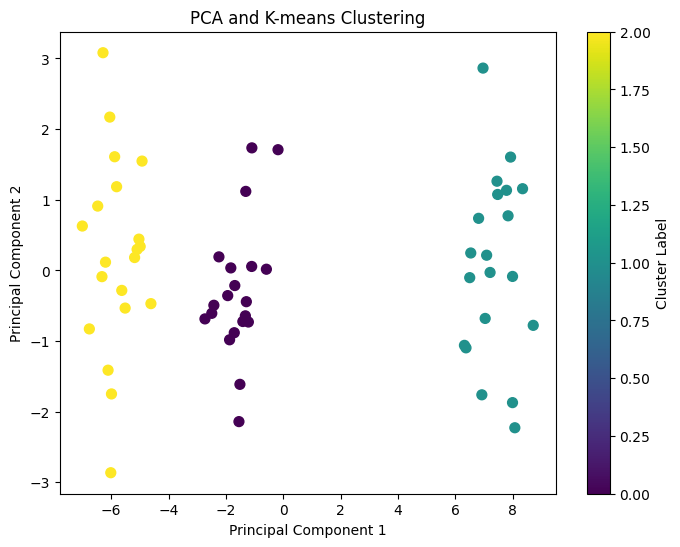

In [11]:
###(a)(b)畫出分群結果
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('PCA and K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

Cross Tabulation of True Labels vs K-means Clusters:
K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0


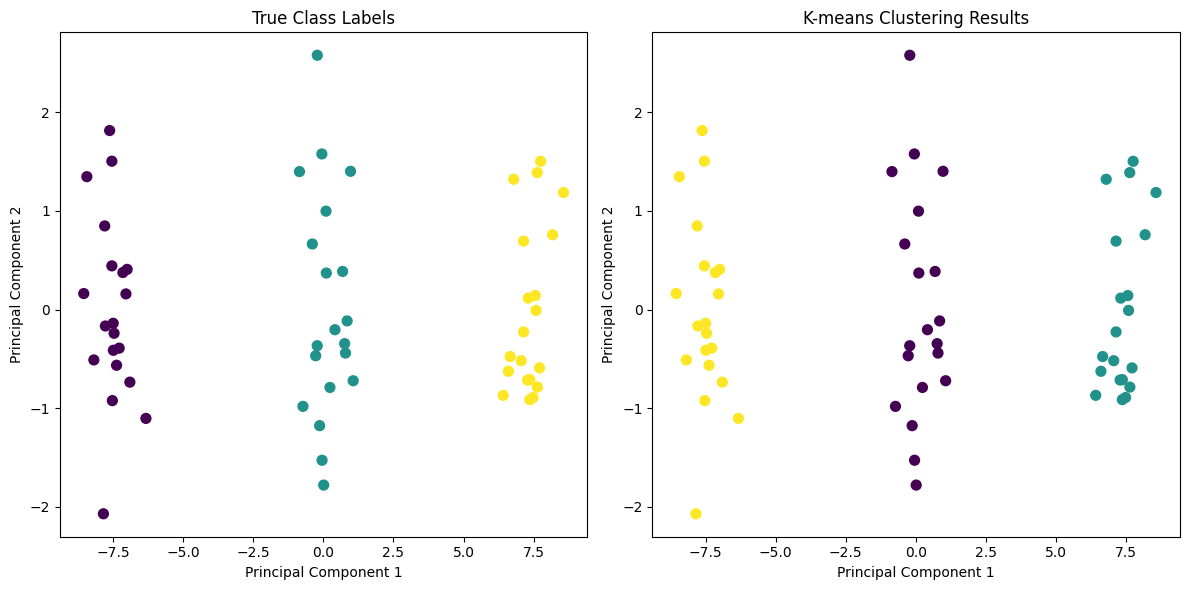

In [12]:
###(c)
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: 模擬資料
np.random.seed(42)
n_samples = 20
n_features = 50

# 生成三個類別的數據集，並引入均值偏移量
class1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
class2 = np.random.normal(loc=2, scale=1, size=(n_samples, n_features))
class3 = np.random.normal(loc=4, scale=1, size=(n_samples, n_features))

# 合併資料集
data = np.vstack([class1, class2, class3])

# 真實標籤 (0: class1, 1: class2, 2: class3)
true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# Step 2: 資料標準化
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: K-means 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_standardized)
cluster_labels = kmeans.labels_

# Step 4: 使用交叉表檢查 K-means 結果與真實標籤的匹配度
# 使用 pd.crosstab() 比較真實標籤與聚類標籤
cross_tab = pd.crosstab(true_labels, cluster_labels, rownames=['True Class'], colnames=['K-means Cluster'])

print("Cross Tabulation of True Labels vs K-means Clusters:")
print(cross_tab)

# Step 5: 視覺化聚
# PCA降維，取前兩個主成分
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# 使用不同顏色顯示 K-means 聚類結果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=true_labels, cmap='viridis', s=50)
plt.title("True Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# 使用不同顏色顯示 K-means 聚類結果
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("K-means Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


Cross Tabulation of True Labels vs K-means Clusters (K=2):
K-means Cluster (K=2)   0   1
True Class                   
0                      20   0
1                      20   0
2                       0  20


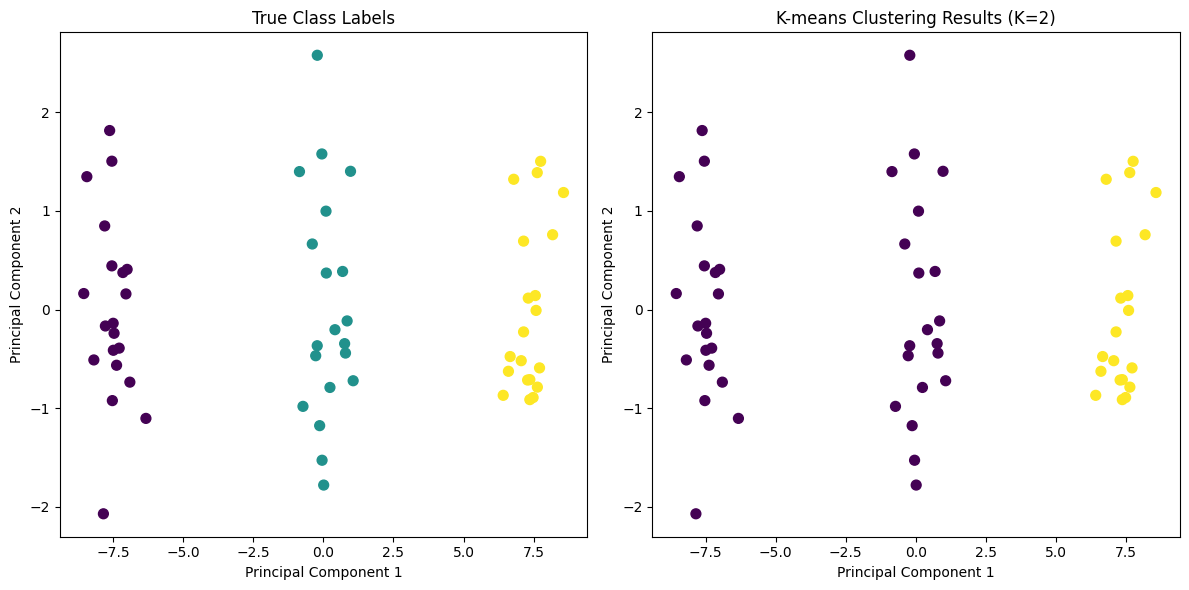

In [14]:
##(d)
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: 生成模擬資料
np.random.seed(42)
n_samples = 20
n_features = 50

# 生成三個類別的數據集
class1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
class2 = np.random.normal(loc=2, scale=1, size=(n_samples, n_features))
class3 = np.random.normal(loc=4, scale=1, size=(n_samples, n_features))

# 資料集
data = np.vstack([class1, class2, class3])

# 真實標籤 (0: class1, 1: class2, 2: class3)
true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# Step 2: 資料標準化
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: 執行 K-means 聚類 (K = 2)
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(data_standardized)
cluster_labels_2 = kmeans_2.labels_

# Step 4: 使用交叉表檢查 K-means 結果與真實標籤的匹配度
cross_tab_2 = pd.crosstab(true_labels, cluster_labels_2, rownames=['True Class'], colnames=['K-means Cluster (K=2)'])
print("Cross Tabulation of True Labels vs K-means Clusters (K=2):")
print(cross_tab_2)

# Step 5: 視覺化 K-means (K = 2) 結果與真實標籤
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# 使用不同顏色顯示 K-means 聚類結果 (K=2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=true_labels, cmap='viridis', s=50)
plt.title("True Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# 使用不同顏色顯示 K-means 聚類結果 (K=2)
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels_2, cmap='viridis', s=50)
plt.title("K-means Clustering Results (K=2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [15]:
###(d)result 結論：
##當K=2 時，K-means 無法正確區分所有三個真實類別，只能將 Class 0 和 Class 1 合併為一個群組。
##如果希望更好地分隔三個類別，應該考慮增加 K 值
##K=3,這樣 K-means 才能對每個類別進行更精確的分群。

Cross Tabulation of True Labels vs K-means Clusters (K=4):
K-means Cluster (K=4)  0   1   2   3
True Class                          
0                      0   0  20   0
1                      8   0   0  12
2                      0  20   0   0


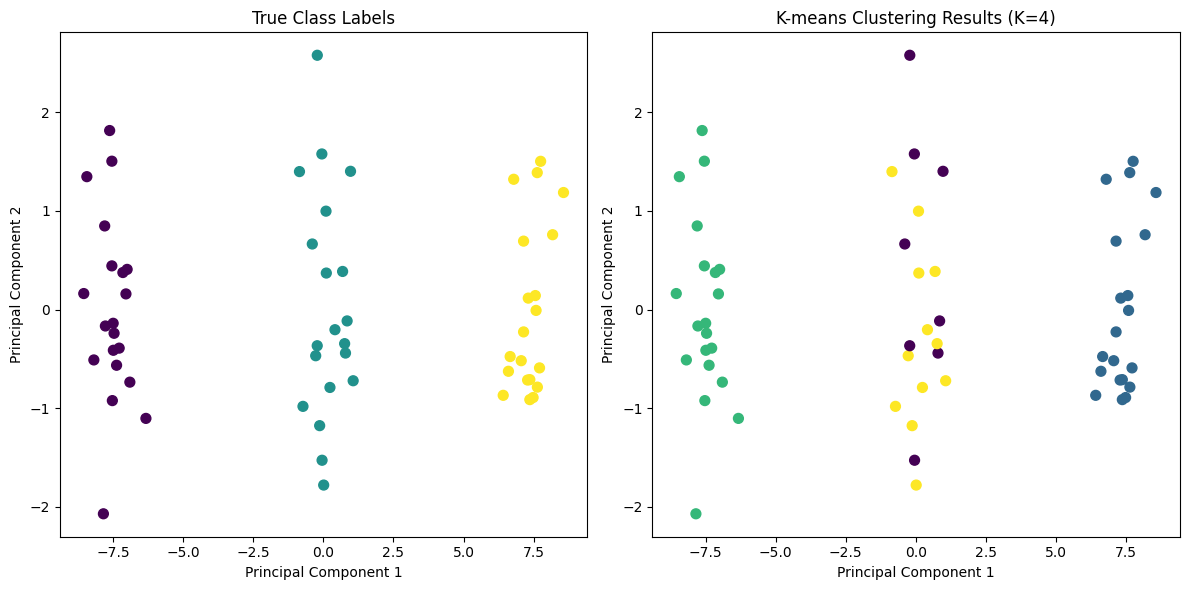

In [16]:
###(e)
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: 生成模擬資料
np.random.seed(42)
n_samples = 20
n_features = 50

# 生成三個類別的數據集
class1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
class2 = np.random.normal(loc=2, scale=1, size=(n_samples, n_features))
class3 = np.random.normal(loc=4, scale=1, size=(n_samples, n_features))

# 合併成一個完整的資料集
data = np.vstack([class1, class2, class3])

# 真實標籤 (0: class1, 1: class2, 2: class3)
true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# Step 2: 資料標準化
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: 執行 K-means 聚類 (K = 4)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(data_standardized)
cluster_labels_4 = kmeans_4.labels_

# Step 4: 使用交叉表檢查 K-means 結果與真實標籤的匹配度
cross_tab_4 = pd.crosstab(true_labels, cluster_labels_4, rownames=['True Class'], colnames=['K-means Cluster (K=4)'])
print("Cross Tabulation of True Labels vs K-means Clusters (K=4):")
print(cross_tab_4)

# Step 5: 視覺化 K-means (K = 4) 結果與真實標籤
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# 使用不同顏色顯示 K-means 聚類結果 (K=4)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=true_labels, cmap='viridis', s=50)
plt.title("True Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# 使用不同顏色顯示 K-means 聚類結果 (K=4)
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels_4, cmap='viridis', s=50)
plt.title("K-means Clustering Results (K=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [17]:
####(e)
#當設定 K-means 聚類的群數為 K = 4 時，我們發現三個真實類別被劃分為四個群組。根據交叉表結果，`Class 0` 和 `Class 1` 的觀測值被分配到兩個不同的群組中 (`Cluster 0` 和 `Cluster 2`)，而 `Class 2` 則被劃分為兩個群組 (`Cluster 1` 和 `Cluster 3`)。

#視覺化結果顯示，當 K = 4 時，K-means 聚類結果比 K = 3 更為細緻，但仍然無法完全匹配真實類別。這是因為 K-means 進一步劃分了原本的類別，導致某些類別被分配到了多個群組中。


Cross Tabulation of True Labels vs K-means Clusters (PCA):
K-means Cluster (PCA)   0   1   2
True Class                       
0                       0  20   0
1                      20   0   0
2                       0   0  20


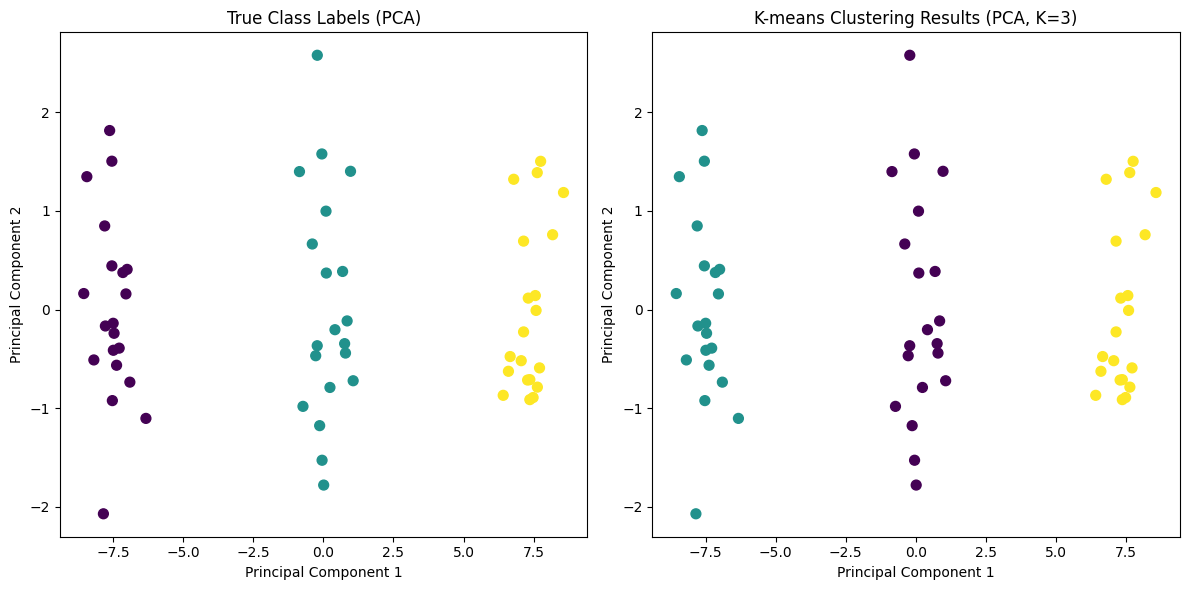

In [18]:
##(f)import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: 生成模擬資料
np.random.seed(42)
n_samples = 20
n_features = 50

# 生成三個類別的數據集
class1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
class2 = np.random.normal(loc=2, scale=1, size=(n_samples, n_features))
class3 = np.random.normal(loc=4, scale=1, size=(n_samples, n_features))

# 合併成一個完整的資料集
data = np.vstack([class1, class2, class3])

# 真實標籤 (0: class1, 1: class2, 2: class3)
true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# Step 2: 資料標準化
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: 執行 PCA，取前兩個主成分
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)  # shape 為 (60, 2)

# Step 4: 使用前兩個主成分執行 K-means 聚類 (K = 3)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(data_pca)
cluster_labels_pca = kmeans_pca.labels_

# Step 5: 使用交叉表檢查 K-means 結果與真實標籤的匹配度
cross_tab_pca = pd.crosstab(true_labels, cluster_labels_pca, rownames=['True Class'], colnames=['K-means Cluster (PCA)'])
print("Cross Tabulation of True Labels vs K-means Clusters (PCA):")
print(cross_tab_pca)

# Step 6: 視覺化 PCA 聚類結果與真實標籤
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=true_labels, cmap='viridis', s=50)
plt.title("True Class Labels (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# 使用不同顏色顯示 K-means 聚類結果 (基於前兩個主成分)
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels_pca, cmap='viridis', s=50)
plt.title("K-means Clustering Results (PCA, K=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [19]:
##(f)基於前兩個主成分進行 K-means 聚類（K=3）後，我們發現聚類結果與真實類別標籤基本吻合。交叉表顯示每個真實類別都被準確地分配到了某個特定的群組中。

##視覺化結果也顯示，三個類別在前兩個主成分空間中被良好地分隔開來，且 K-means 的聚類標籤與真實標籤顏色一致。因此，基於 PCA 的 K-means 聚類效果良好。

##這表明前兩個主成分已經保留了大部分資料的變異量，可以作為有效的特徵來進行聚類分析。


Cross Tabulation of True Labels vs K-means Clusters (Standardized Data):
K-means Cluster (Standardized)   0   1   2
True Class                                
0                                0   0  20
1                               20   0   0
2                                0  20   0


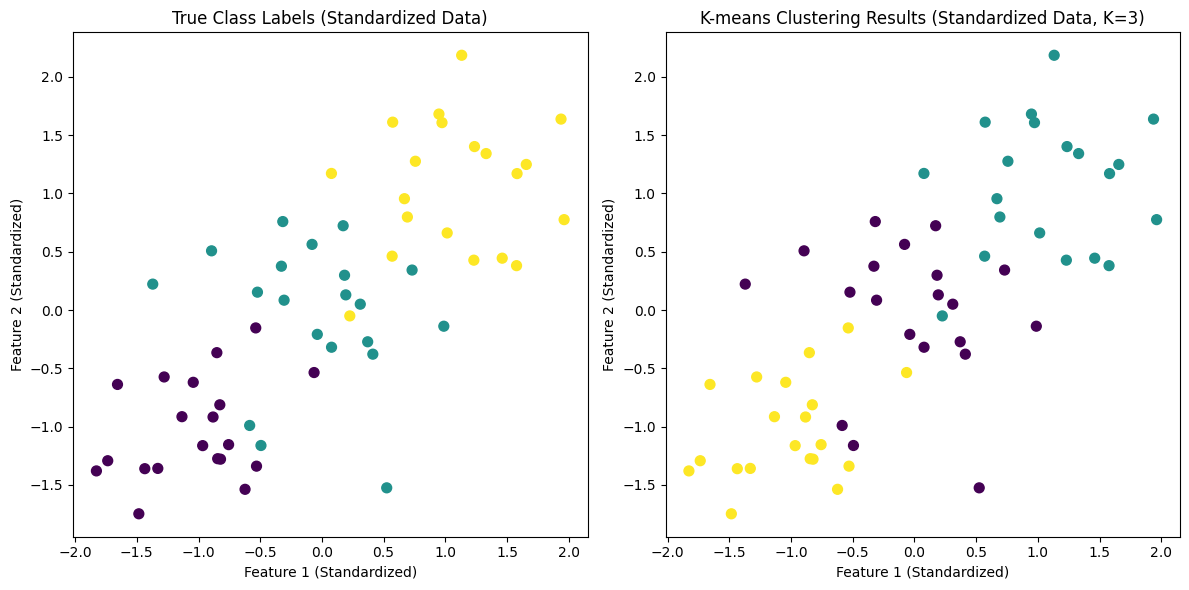

In [20]:
###(g)import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: 生成模擬資料
np.random.seed(42)
n_samples = 20
n_features = 50

# 生成三個類別的數據集
class1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
class2 = np.random.normal(loc=2, scale=1, size=(n_samples, n_features))
class3 = np.random.normal(loc=4, scale=1, size=(n_samples, n_features))

# 合併成一個完整的資料集
data = np.vstack([class1, class2, class3])

# 真實標籤 (0: class1, 1: class2, 2: class3)
true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# Step 2: 使用 StandardScaler 對資料進行標準化
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: 使用標準化後的資料進行 K-means 聚類 (K=3)
kmeans_standardized = KMeans(n_clusters=3, random_state=42)
kmeans_standardized.fit(data_standardized)
cluster_labels_standardized = kmeans_standardized.labels_

# Step 4: 使用交叉表檢查 K-means 結果與真實標籤的匹配度
cross_tab_standardized = pd.crosstab(true_labels, cluster_labels_standardized, rownames=['True Class'], colnames=['K-means Cluster (Standardized)'])
print("Cross Tabulation of True Labels vs K-means Clusters (Standardized Data):")
print(cross_tab_standardized)

# Step 5: 比較標準化前後的聚類結果（假設有標準化前的結果資料）
# 如果 (b) 中的結果已經保存，可以通過下面的方式進行比較
# cross_tab_original = pd.crosstab(true_labels, cluster_labels_original, rownames=['True Class'], colnames=['K-means Cluster (Original Data)'])
# print("Cross Tabulation of True Labels vs K-means Clusters (Original Data):")
# print(cross_tab_original)

# Step 6: 視覺化比較
plt.figure(figsize=(12, 6))

# 視覺化原始標籤
plt.subplot(1, 2, 1)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], c=true_labels, cmap='viridis', s=50)
plt.title("True Class Labels (Standardized Data)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")

# 使用標準化後的 K-means 聚類結果
plt.subplot(1, 2, 2)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], c=cluster_labels_standardized, cmap='viridis', s=50)
plt.title("K-means Clustering Results (Standardized Data, K=3)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")

plt.tight_layout()
plt.show()


In [ ]:
##(f)
##基於標準化資料進行 K-means 聚類（K=3）後，結果顯示三個類別被正確地分配到了三個不同的群組。相比 (b) 中未標準化的聚類結果，標準化後的 K-means 聚類效果更好。

##這表明原始資料中某些特徵的變異量過大，影響了未標準化資料的聚類效果。通過標準化處理，所有特徵在聚類中具有相同的權重，因此使 K-means 能夠更準確地識別三個類別。
